# Introduction to Logistic Regression in PyTorch

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from tqdm import tqdm_notebook

### MNIST Dataset

In [3]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))

Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


Default image shape: torch.Size([1, 28, 28])
Reshaped image shape: torch.Size([28, 28])
The label for this image: 1


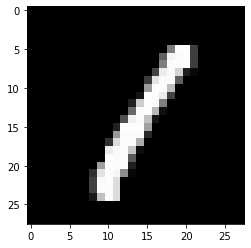

In [7]:
# Pick out the 4th (0-indexed) example from the training set
image, label = mnist_train[3]

# Plot the image
print("Default image shape: {}".format(image.shape))
image = image.reshape([28, 28])
print("Reshaped image shape: {}".format(image.shape))
plt.imshow(image, cmap = "gray")

# Print the Label
print("The label for this image: {}".format(label))

Using DataLoader to take care of shuffling and batching:

In [9]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

Minibatch drawn from a DataLoader:

In [10]:
data_train_iter = iter(train_loader)
images, labels = data_train_iter.next()

print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))

Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])


### Logistic Regression Model

The forward pass

In [11]:
x = images.view(-1, 28*28)
print("The shape of input x: {}".format(x.shape))

The shape of input x: torch.Size([100, 784])


In [12]:
# Randomly initialize weights W
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

# Initialize bias b as 0s
b = torch.zeros(10, requires_grad=True)

In [13]:
# Linear transformation with W and b
y = torch.matmul(x, W) + b

In [14]:
print(y[0,:])

tensor([-0.0682, -0.1788,  0.2410,  0.9463,  0.2906, -0.0256,  0.1923,  0.4825,
         0.2601,  0.0208], grad_fn=<SliceBackward>)


In [15]:
# Option 1: Softmax to probabilities from equation
py_eq = torch.exp(y) / torch.sum(torch.exp(y), dim=1, keepdim=True)
print("py[0] from equation: {}".format(py_eq[0]))

# Option 2: Softmax to probabilities with torch.nn.funtional
import torch.nn.functional as F
py = F.softmax(y, dim=1)
print("py[0] with torch.nn.functional.softmax: {}".format(py[0]))

py[0] from equation: tensor([0.0714, 0.0639, 0.0973, 0.1969, 0.1022, 0.0745, 0.0927, 0.1238, 0.0992,
        0.0781], grad_fn=<SelectBackward>)
py[0] with torch.nn.functional.softmax: tensor([0.0714, 0.0639, 0.0973, 0.1969, 0.1022, 0.0745, 0.0927, 0.1238, 0.0992,
        0.0781], grad_fn=<SelectBackward>)


The cross-entropy loss

In [16]:
print(labels.shape)

torch.Size([100])


In [17]:
# Cross-entropy Loss from equation
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross entropy from equation: {}".format(cross_entropy_eq))

# Option 2: cross-entropy Loss with torch.nn.functional
cross_entropy = F.cross_entropy(y, labels)
print("cross entropy with torch.nn.functional.cross_entropy: {}".format(cross_entropy))

cross entropy from equation: 2.427194595336914
cross entropy with torch.nn.functional.cross_entropy: 2.427194118499756


The backwards pass

In [20]:
# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)

In [21]:
cross_entropy.backward()

In [22]:
b.grad

tensor([-0.0162, -0.0545, -0.0352,  0.1005,  0.0869,  0.0188, -0.1267,  0.0348,
         0.0251, -0.0335])

In [23]:
optimizer.step()

Our learning rate to 0.1, so b has been updated by -0.1*b.grad

In [24]:
b

tensor([ 0.0016,  0.0055,  0.0035, -0.0101, -0.0087, -0.0019,  0.0127, -0.0035,
        -0.0025,  0.0034], requires_grad=True)

In [25]:
print("b.grad before zero_grad(): {}".format(b.grad))
optimizer.zero_grad()
print("b.grad after zero_grad(): {}".format(b.grad))

b.grad before zero_grad(): tensor([-0.0162, -0.0545, -0.0352,  0.1005,  0.0869,  0.0188, -0.1267,  0.0348,
         0.0251, -0.0335])
b.grad after zero_grad(): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


### Model Training

1. Draw a minibatch
2. Zero the gradients in the buffers for W and b
3. Perform the forward pass (compute prediction, calculate loss)
4. Perform the backward pass (compute gradients, perform SGD step)

In [30]:
# Iterate through train set minibatchs
for images, labels in tqdm(train_loader):
  # Zero out the gradients
  optimizer.zero_grad()

  # Forward pass
  x = images.view(-1, 28*28)
  y = torch.matmul(x, W) + b
  cross_entropy = F.cross_entropy(y, labels)
  # Backward pass
  cross_entropy.backward()
  optimizer.step()

100%|██████████| 600/600 [00:06<00:00, 99.45it/s]


### Testing

In [31]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
  # Iterate through test set minibatchs
  for images, labels in tqdm(test_loader):
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b

    predictions = torch.argmax(y, dim=1)
    correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

100%|██████████| 100/100 [00:01<00:00, 86.73it/s]

Test accuracy: 0.902999997138977


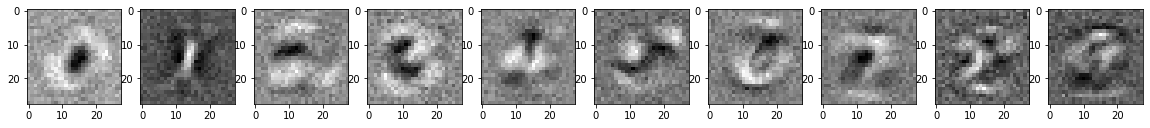

In [32]:
# Get Weights
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
  ax[digit].imshow(W[:,digit].detach().view(28,28), cmap='gray')

# High level APIs

### object-oriented Refactorization

In [ ]:
# Note: illustrative example only; see below for torch.nn usage
class xW_plus_b:
  def __init__(self, dim_in, dim_out):
    self.W = torch.randn(dim_in, dim_out)/np.sqrt(dim_in)
    self.W.requires_grad_()
    self.b = torch.zeros(dim_out, requires_grad=True)

  def forward(self, x):
    return torch.matmul(x, self.W) + self.b

In [ ]:
# Note: illustrative example only; see below for torch.nn usage
lin_custom = xW_plus_b(784, 10)
print("W: {}".format(lin_custom.W.shape))
print("b: {}".format(lin_custom.b.shape))

In [ ]:
# Note: illustrative example only; see below for torch.nn usage
x_rand = torch.randn(1,784)
y = lin_custom.forward(x_rand)
print(y.shape)

Using torch.nn

In [ ]:
import torch.nn as nn

In [ ]:
lin = nn.Linear(784, 10)
print("Linear parameters: {}".format([p.shape for p in lin.parameters()]))

y = lin(x_rand)
print(y.shape)

Using torch.nn.Module

In [ ]:
class MNIST_Logistic_Regression(nn.Module):
  def __init(self):
    super().__init__()
    self.lin = nn.Linear(784, 10)

  def forward(self. x):
    return self.lin(x)

In [ ]:
model = MNIST_Logistic_Regression()
y = model(x_rand)
print("The model: \n{}".format(model))
print("\nParameters: \n{}".format(list(model.parameters())))
print("\nOutput shape: \n{}".format(y.shape))